<a href="https://colab.research.google.com/github/nouval0425/Learning-Python/blob/main/Methode_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import numpy as np

np.random.seed(0)

def make_dd_matrix(n, scale=10.0):
    A = np.random.rand(n, n)
    for i in range(n):
        A[i,i] += scale
    return A

def gaussian_elimination(A, b):
    A = A.astype(float).copy()
    b = b.astype(float).copy()
    n = A.shape[0]
    for k in range(n-1):
        piv = np.argmax(np.abs(A[k:,k])) + k
        if piv != k:
            A[[k,piv]] = A[[piv,k]]
            b[[k,piv]] = b[[piv,k]]
        for i in range(k+1, n):
            if A[k,k] == 0:
                continue
            factor = A[i,k] / A[k,k]
            A[i,k:] -= factor * A[k,k:]
            b[i] -= factor * b[k]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        s = b[i] - np.dot(A[i,i+1:], x[i+1:])
        x[i] = s / A[i,i]
    return x

def gauss_jordan(A, b):
    M = np.hstack((A.astype(float).copy(), b.reshape(-1,1).astype(float).copy()))
    n = A.shape[0]
    for i in range(n):
        piv = np.argmax(np.abs(M[i:,i])) + i
        if piv != i:
            M[[i,piv]] = M[[piv,i]]
        pivot = M[i,i]
        M[i] = M[i] / pivot
        for r in range(n):
            if r == i: continue
            factor = M[r,i]
            if factor != 0:
                M[r] -= factor * M[i]
    return M[:, -1]

def jacobi(A, b, max_iter=100):
    n = len(b)
    x = np.zeros(n)
    D = np.diag(A)
    R = A - np.diagflat(D)
    for _ in range(max_iter):
        x = (b - R @ x) / D
    return x

def gauss_seidel(A, b, max_iter=100):
    n = len(b)
    x = np.zeros(n)
    for _ in range(max_iter):
        for i in range(n):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x[i] = (b[i] - s1 - s2) / A[i,i]
    return x

# Problem size and matrix
n = 120
A = make_dd_matrix(n, scale=10.0)
b = np.random.rand(n)

methods = []

# numpy.linalg.solve
t0 = time.time()
x_lu = np.linalg.solve(A, b)
t_lu = time.time() - t0
methods.append(("numpy.linalg.solve (LU)", t_lu, np.linalg.norm(A.dot(x_lu)-b)))

# inverse
t0 = time.time()
x_inv = np.linalg.inv(A) @ b
t_inv = time.time() - t0
methods.append(("matrix inverse", t_inv, np.linalg.norm(A.dot(x_inv)-b)))

# manual gaussian elimination
t0 = time.time()
x_ge = gaussian_elimination(A.copy(), b.copy())
t_ge = time.time() - t0
methods.append(("gaussian elimination (manual)", t_ge, np.linalg.norm(A.dot(x_ge)-b)))

# gauss-jordan
t0 = time.time()
x_gj = gauss_jordan(A.copy(), b.copy())
t_gj = time.time() - t0
methods.append(("gauss-jordan (manual)", t_gj, np.linalg.norm(A.dot(x_gj)-b)))

# jacobi
t0 = time.time()
x_j = jacobi(A, b, max_iter=100)
t_j = time.time() - t0
methods.append(("jacobi (100 iters)", t_j, np.linalg.norm(A.dot(x_j)-b)))

# gauss-seidel
t0 = time.time()
x_gs = gauss_seidel(A, b, max_iter=100)
t_gs = time.time() - t0
methods.append(("gauss-seidel (100 iters)", t_gs, np.linalg.norm(A.dot(x_gs)-b)))

print("{:<35} {:>10} {:>18}".format("Method", "time (s)", "residual norm ||Ax-b||"))
for name, t, r in methods:
    print("{:<35} {:10.6f} {:18.6e}".format(name, t, r))

Method                                time (s) residual norm ||Ax-b||
numpy.linalg.solve (LU)               0.001855       1.644855e-15
matrix inverse                        0.006158       1.842717e-15
gaussian elimination (manual)         0.056510       2.056068e-15
gauss-jordan (manual)                 0.075631       2.426758e-15
jacobi (100 iters)                    0.001366       4.513254e+75
gauss-seidel (100 iters)              0.060891       1.586883e-13


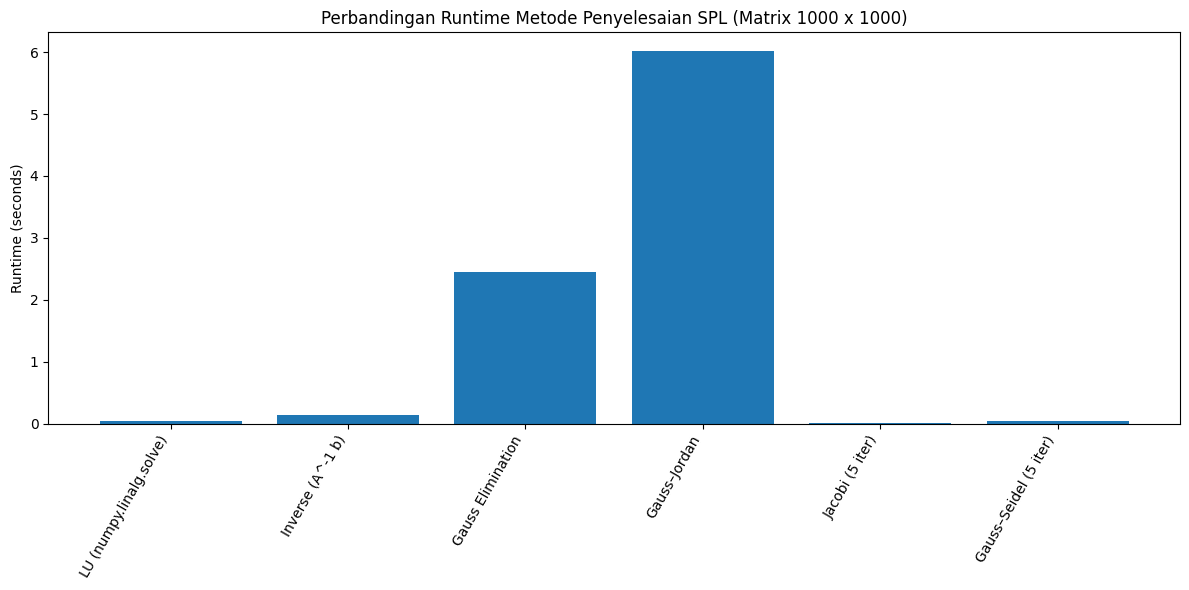

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# Generate matrix 1000x1000 (strong diagonal dominance)
# -------------------------------------------------------------
np.random.seed(0)
n = 1000
A = np.random.rand(n, n)
A += np.eye(n) * 600
b = np.random.rand(n)

times = {}

# -------------------------------------------------------------
# 1. LU Solve (numpy.linalg.solve)
# -------------------------------------------------------------
t0 = time.perf_counter()
x_lu = np.linalg.solve(A, b)
times["LU (numpy.linalg.solve)"] = time.perf_counter() - t0


# -------------------------------------------------------------
# 2. Matrix Inverse
# -------------------------------------------------------------
t0 = time.perf_counter()
x_inv = np.linalg.inv(A) @ b
times["Inverse (A^-1 b)"] = time.perf_counter() - t0


# -------------------------------------------------------------
# 3. Eliminasi Gauss (manual)
# -------------------------------------------------------------
def gauss_elimination(A, b):
    A = A.copy()
    b = b.copy()
    n = len(b)
    for k in range(n-1):
        for i in range(k+1, n):
            factor = A[i, k] / A[k, k]
            A[i, k:] -= factor * A[k, k:]
            b[i] -= factor * b[k]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - A[i, i+1:] @ x[i+1:]) / A[i, i]
    return x

t0 = time.perf_counter()
x_gauss = gauss_elimination(A, b)
times["Gauss Elimination"] = time.perf_counter() - t0


# -------------------------------------------------------------
# 4. Gauss–Jordan (manual)
# -------------------------------------------------------------
def gauss_jordan(A, b):
    A = A.copy()
    b = b.copy()
    n = len(b)
    for i in range(n):
        A[i] = A[i] / A[i, i]
        b[i] = b[i] / A[i, i]
        for j in range(n):
            if i != j:
                factor = A[j, i]
                A[j] -= factor * A[i]
                b[j] -= factor * b[i]
    return b

t0 = time.perf_counter()
x_gj = gauss_jordan(A, b)
times["Gauss–Jordan"] = time.perf_counter() - t0


# -------------------------------------------------------------
# 5. Jacobi Iteration
# -------------------------------------------------------------
def jacobi(A, b, it=5):
    n = len(b)
    x = np.zeros(n)
    D = np.diag(A)
    R = A - np.diagflat(D)
    for _ in range(it):
        x = (b - R @ x) / D
    return x

t0 = time.perf_counter()
x_jacobi = jacobi(A, b, 5)
times["Jacobi (5 iter)"] = time.perf_counter() - t0


# -------------------------------------------------------------
# 6. Gauss–Seidel Iteration
# -------------------------------------------------------------
def gauss_seidel(A, b, it=5):
    n = len(b)
    x = np.zeros(n)
    for _ in range(it):
        for i in range(n):
            x[i] = (b[i] - A[i,:i] @ x[:i] - A[i,i+1:] @ x[i+1:]) / A[i,i]
    return x

t0 = time.perf_counter()
x_gs = gauss_seidel(A, b, 5)
times["Gauss–Seidel (5 iter)"] = time.perf_counter() - t0


# -------------------------------------------------------------
# Plotting Grafik Runtime
# -------------------------------------------------------------
methods = list(times.keys())
values = list(times.values())

plt.figure(figsize=(12, 6))
plt.bar(methods, values)
plt.ylabel("Runtime (seconds)")
plt.title("Perbandingan Runtime Metode Penyelesaian SPL (Matrix 1000 x 1000)")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()